### BADASS Analysis: fatty acids

##### Can we reduce the array of 48 barrels whilst maintaining model accuracy?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, confusion_matrix
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.utils.multiclass import unique_labels

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size
sns.set_style('white')  # Sets default figure aesthetics
sns.set_palette('colorblind')

#### Parse in input data

Large array fatty acid data

In [5]:
l_fa_fluor_data = ParseArrayData(
    dir_path='/home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Paper_analysis/FAs/Large_array',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Paper_analysis/FAs/Large_array already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite Paper_analysis/FAs/Large_array?y


Locate xlsx files

In [6]:
l_fa_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [7]:
l_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_1.xlsx
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_1.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_2.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_2.xlsx
Parsing plate /home/ks17361/arra

Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_10.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_10.xlsx
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_10.xlsx
 WARNING - fluorescence of (O + GRP52 + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /home/ks17361/array_sensing_env/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_10.xlsx


Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [8]:
l_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: N, 5 (flagged readings = CCPent: 0.16943537676233217, GRP52: 0.06116168052680828) 
 Outlier excluded from final output dataset: O, 8 (flagged readings = CCPent: 0.715122226981689, CCHex2-I24K: 0.7298984369220832, CCHept-I24N: 1.025850279828279, CCHept-L28W: 0.8024693953235129, GRP22: 0.4201989443293729, CCHex: 0.8009377936104601, NLKEIA: 0.4503762960705691, CCHept-L28K: 0.9199052057237955, CCHept-I24T: 0.7484094789503426, CCHept-L7Y: 1.038708261859428, CCHex2: 0.25144269999691565, CCHept-I17G-L21G: 0.5025020784268767, CCHept-I17H: 1.0242690436554487, CCHept-I24H: 0.7386291285565466, CCHept-L28Y: 0.8168417069884344, CCHept-I17A-L21A: 0.7117407900052798, CCHept-L21S-I24S: 0.9652350222314914, CCHept-I24Y: 0.9273765511080094, GRP51: 0.5679799449632448, CCHept-I24D: 0.7141826909380344, CCHept-L14A: 0.6959533474811951, CCHept-L7K: 1.1402495043637098, CCHept-L21N-I24N: 0.7200170187269314, CCHept-L21S-I24Y: 0.9440319306961015, GRP52: 0.6552047682340

In [9]:
l_fa_fluor_data.ml_fluor_data

CCPent     QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.148266  10.898551     0.046587     0.303799     0.120764  0.024628   
1   0.150689   8.616352     0.031308     0.269366     0.122485  0.022403   
2   0.134739   9.131387     0.042102     0.251902     0.099580  0.022347   
3   0.144157   8.353846     0.032018     0.195077     0.091621  0.023343   
4   0.140496   6.680233     0.035256     0.217786     0.091910  0.027553   
5   0.170604   5.456000     0.014097     0.117293     0.102808  0.025129   
6   0.179082   3.084112     0.021682     0.138316     0.127927  0.026663   
7   0.177250   3.764368     0.047508     0.149798     0.103648  0.027803   
8   0.159486   3.953846     0.016181     0.101732     0.095983  0.024939   
9   1.022571   0.952756     0.753516     1.087744     0.998670  0.631529   
10  1.176855   1.125714     0.652254     1.008486     1.148558  0.657004   
11  1.004083   1.343511     0.757447     1.124091     1.094118  0.668542   
12  0.932209   1.280000     0.688117     0.967367     1.057789  0.697742   
13  0.924206   1.282759     0.777142     1.084270     1.037485  0.685886   
14  0.948754   1.227273     0.878522     1.004671     1.018159  0.698780   
15  1.046289   1.159722     0.832239     1.103595     1.166603  0.720903   
16  1.004783   0.975976     0.861914     1.155559     1.204928  0.726710   
17  1.011156   0.794444     0.790489     1.114545     1.145403  0.732104   
18  0.979291   0.993827     1.014856     1.062500     1.116327  0.744162   
19  0.062063   1.681818     0.008750     0.097138     0.173016  0.019171   
20  0.066087   1.538462     0.006339     0.079017     0.258288  0.018406   
21  0.081692   1.381910     0.005407     0.075357     0.321024  0.022406   
22  0.071201   1.640351     0.003875     0.063482     0.296945  0.022983   
23  0.081579   1.631944     0.006465     0.066950     0.194404  0.024451   
24  0.057734   1.833333     0.011801     0.114172     0.223357  0.016017   
25  0.044842   0.839080     0.005967     0.135403     0.148415  0.010459   
26  0.047362   1.020833     0.005980     0.103364     0.159434  0.012905   
27  0.055282   1.210884     0.008792     0.086595     0.160268  0.015657   
28  0.045607   0.661202     0.006825     0.121669     0.420932  0.006803   
29  0.054125   0.739130     0.005830     0.132827     0.441681  0.006874   
30  0.055639   0.971631     0.006516     0.140290     0.554430  0.008491   
31  0.057048   0.572254     0.006358     0.133426     0.479014  0.009088   
32  0.056074   1.038043     0.009396     0.112380     0.304307  0.008337   
33  0.047794   1.297710     0.008264     0.109551     0.576740  0.009534   
34  0.060709   1.091892     0.009088     0.103913     0.457480  0.011653   
35  0.048991   0.601064     0.005819     0.096681     0.502240  0.007795   
36  0.053244   0.684932     0.006299     0.081320     0.455614  0.008914   
37  0.055839   0.805405     0.007068     0.100139     0.432981  0.009938   
38  0.903368   1.453901     0.554593     1.190752     1.075472  0.489449   
39  0.855617   0.685393     0.576447     1.255267     1.058119  0.540944   
40  1.052817   0.842105     0.963315     1.332277     1.042014  0.515465   
41  0.996725   1.167513     0.710384     1.417928     1.059033  0.515466   
42  0.894747   1.079545     0.732024     1.409620     1.108137  0.502970   
43  0.877188   1.007042     0.679841     1.231749     1.040937  0.502865   
44  0.889601   1.029070     0.719770     1.106825     1.105547  0.487414   
45  0.881351   1.024096     0.678937     1.304746     1.131148  0.533250   
46  0.857674   1.014085     0.818040     1.231109     1.106649  0.484938   
47  0.845154   1.305085     0.698801     1.261290     1.081986  0.490687   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.274981  0.038749     0.254368     0.302122  ...          0.106926   
1   0.299807  0.040383     0.246034     0.229747  ...          0.100787   
2   0.251772  0.036533     0.237000     0.218262  ...   

In [10]:
l_fa_df = l_fa_fluor_data.ml_fluor_data

Generates "representative" fingerprint for each class (by calculating the median value for each feature)

N


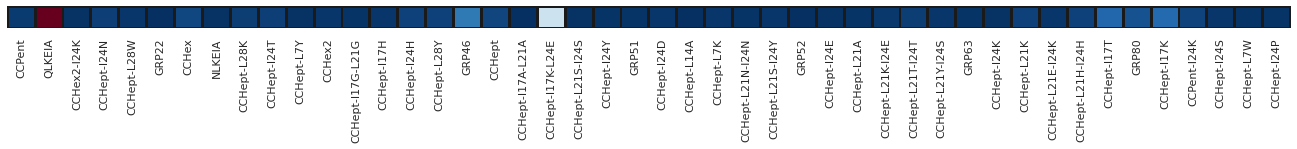

B


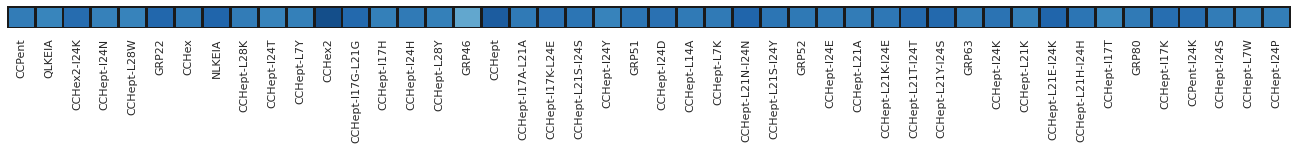

O


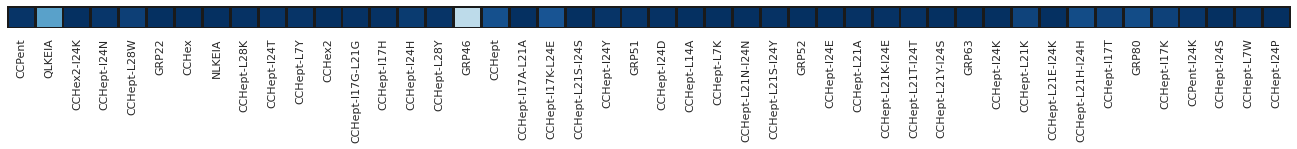

P


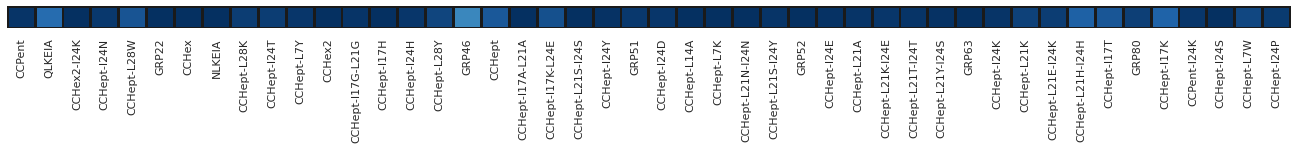

D


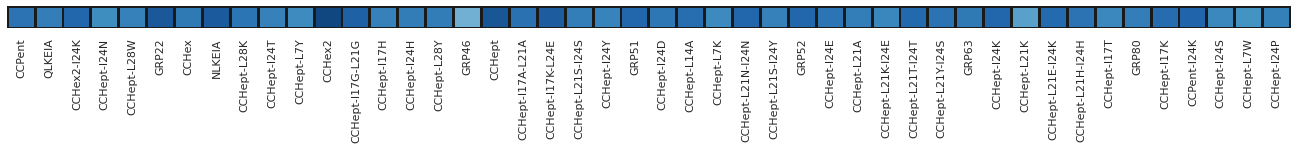

In [11]:
classes = []
for class_name in l_fa_df['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)

l_fa_df_x_val = l_fa_df.drop(['Analyte'], axis=1)
class_median_x_val = []
for class_name in classes:
    class_indices = [n for n in range(l_fa_df.shape[0]) if l_fa_df['Analyte'][n] == class_name]
    class_median_x_val.append(np.median(l_fa_df_x_val.values[class_indices, :], axis=0))

vmin = np.amin(class_median_x_val)
vmax = np.amax(class_median_x_val)

for index, class_name in enumerate(classes):
    print(class_name)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([class_median_x_val[index]]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=False,
        xticklabels=l_fa_df_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.savefig('{}/{}_median_barrel_readings_heatmap.svg'.format(l_fa_fluor_data.results_dir, class_name))
    plt.show()

Generates box plots to compare the distribution of values for each class across the 46 features

Butanoic acid


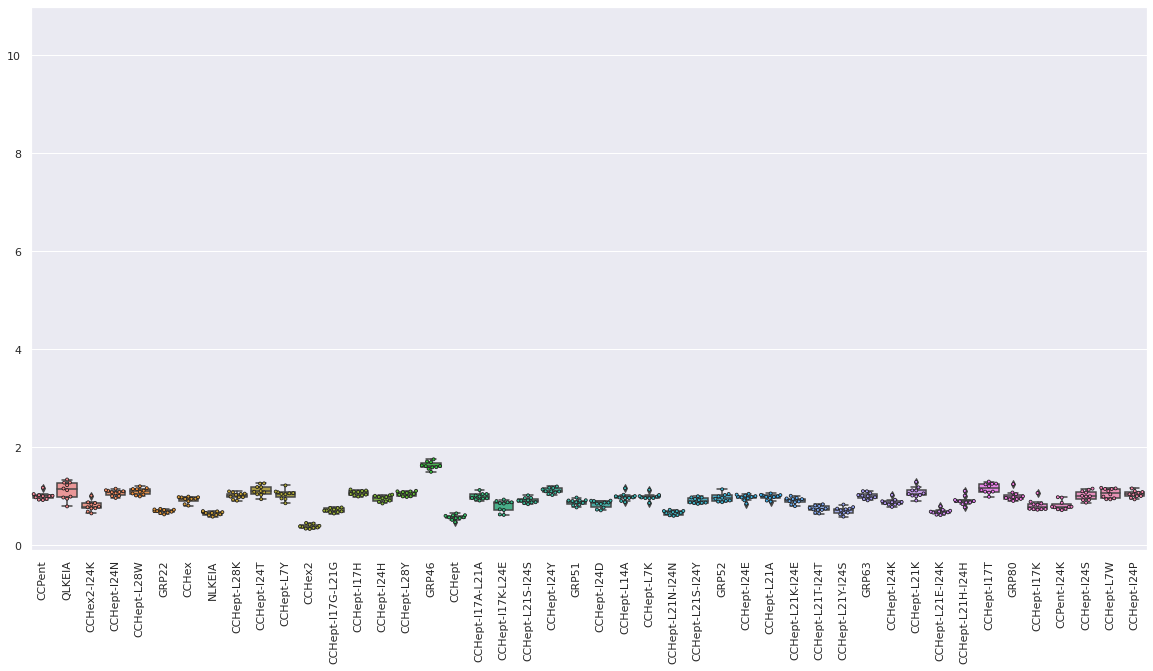

Decanoic acid


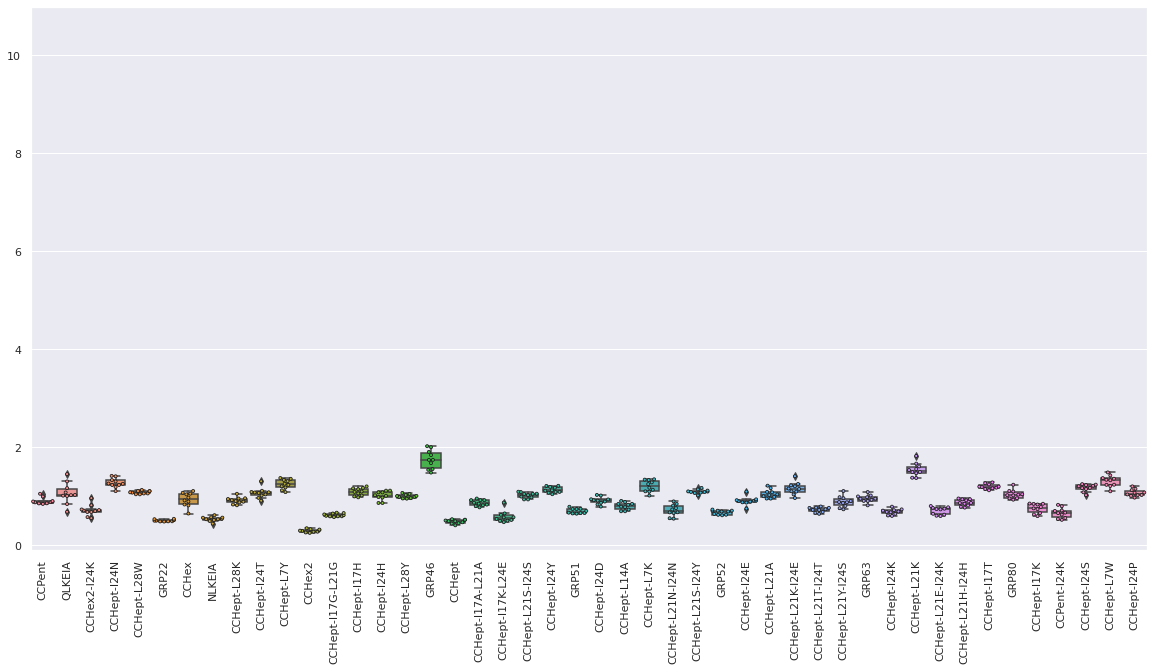

Palmitic acid


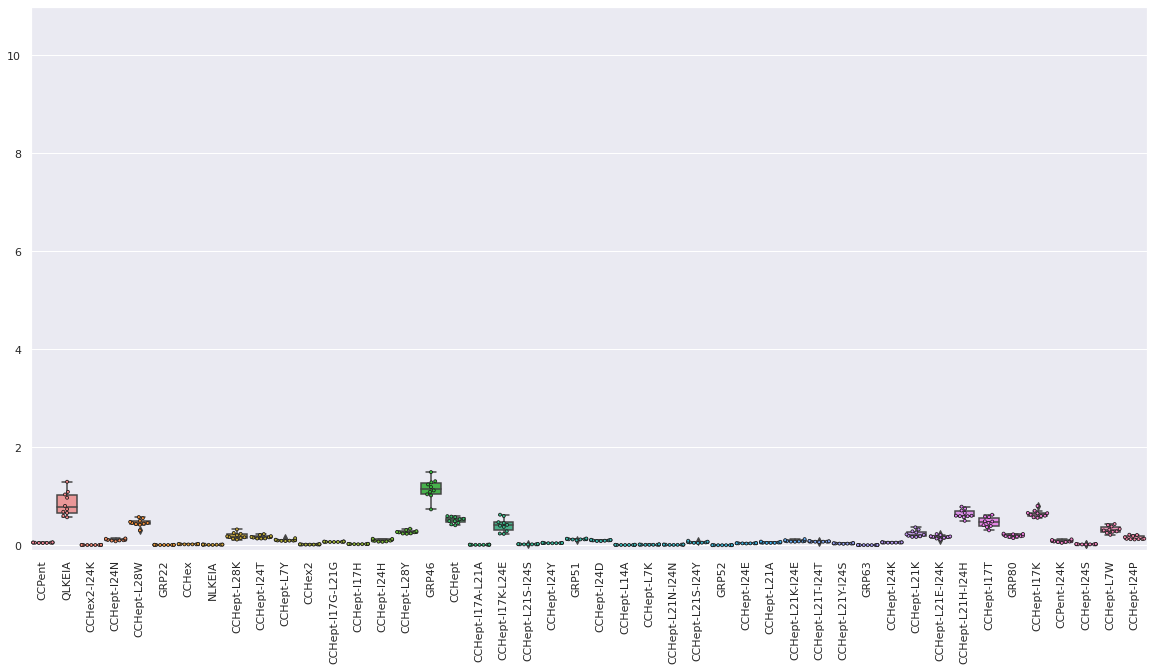

Oleic acid


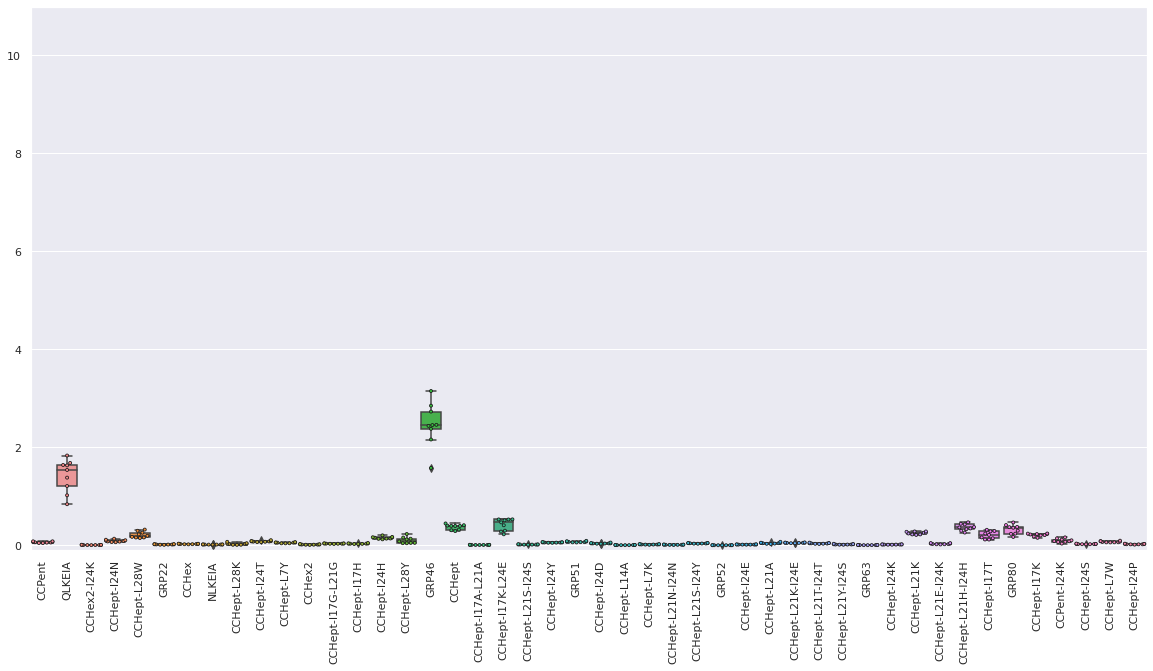

Nervonic acid


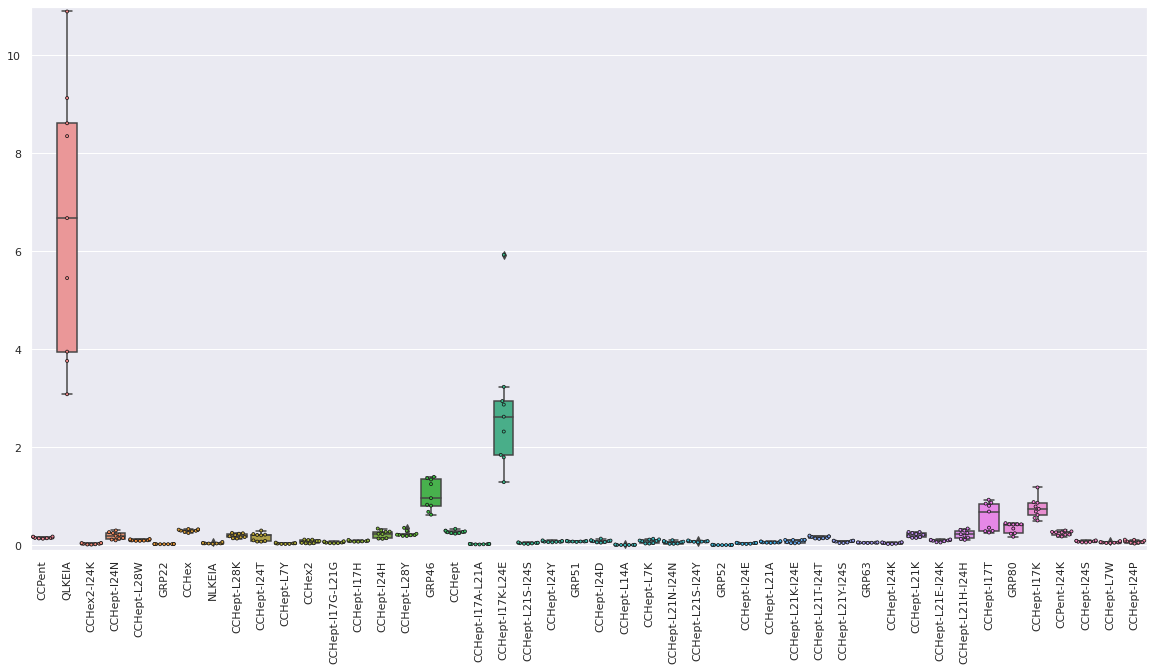

In [12]:
ymin = l_fa_df.drop('Analyte', axis=1).min().min() - 0.1
ymax = l_fa_df.drop('Analyte', axis=1).max().max() + 0.1

b_indices = [int(i) for i in range(l_fa_df.shape[0]) if l_fa_df['Analyte'][i] == 'B']
d_indices = [int(i) for i in range(l_fa_df.shape[0]) if l_fa_df['Analyte'][i] == 'D']
p_indices = [int(i) for i in range(l_fa_df.shape[0]) if l_fa_df['Analyte'][i] == 'P']
o_indices = [int(i) for i in range(l_fa_df.shape[0]) if l_fa_df['Analyte'][i] == 'O']
n_indices = [int(i) for i in range(l_fa_df.shape[0]) if l_fa_df['Analyte'][i] == 'N']

sns.set(rc={'figure.figsize':(20,10)})
print('Butanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_df.iloc[b_indices])
sns.swarmplot(data=l_fa_df.iloc[b_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Butanoic_acid_barrel_readings_boxplot.svg'.format(l_fa_fluor_data.results_dir))
plt.show()

print('Decanoic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_df.iloc[d_indices])
sns.swarmplot(data=l_fa_df.iloc[d_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Decanoic_acid_barrel_readings_boxplot.svg'.format(l_fa_fluor_data.results_dir))
plt.show()

print('Palmitic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_df.iloc[p_indices])
sns.swarmplot(data=l_fa_df.iloc[p_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Palmitic_acid_barrel_readings_boxplot.svg'.format(l_fa_fluor_data.results_dir))
plt.show()

print('Oleic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_df.iloc[o_indices])
sns.swarmplot(data=l_fa_df.iloc[o_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Oleic_acid_barrel_readings_boxplot.svg'.format(l_fa_fluor_data.results_dir))
plt.show()

print('Nervonic acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_fa_df.iloc[n_indices])
sns.swarmplot(data=l_fa_df.iloc[n_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('{}/Nervonic_acid_barrel_readings_boxplot.svg'.format(l_fa_fluor_data.results_dir))
plt.show()

#### Run machine learning

In [14]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size
ml = RunML(
    results_dir='/home/ks17361/array_sensing_env/array_sensing/Paper_analysis/FAs/Large_array_ML_results/',
    fluor_data=l_fa_df
)

Directory /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/FAs/Large_array_ML_results/ already found in /home/ks17361/array_sensing_env/array_sensing
Overwrite /home/ks17361/array_sensing_env/array_sensing/Paper_analysis/FAs/Large_array_ML_results/?y


In [15]:
ml.split_train_test_data(randomise=True, percent_test=0, test_analytes=[])

- Visualise correlation between the initial 46 features

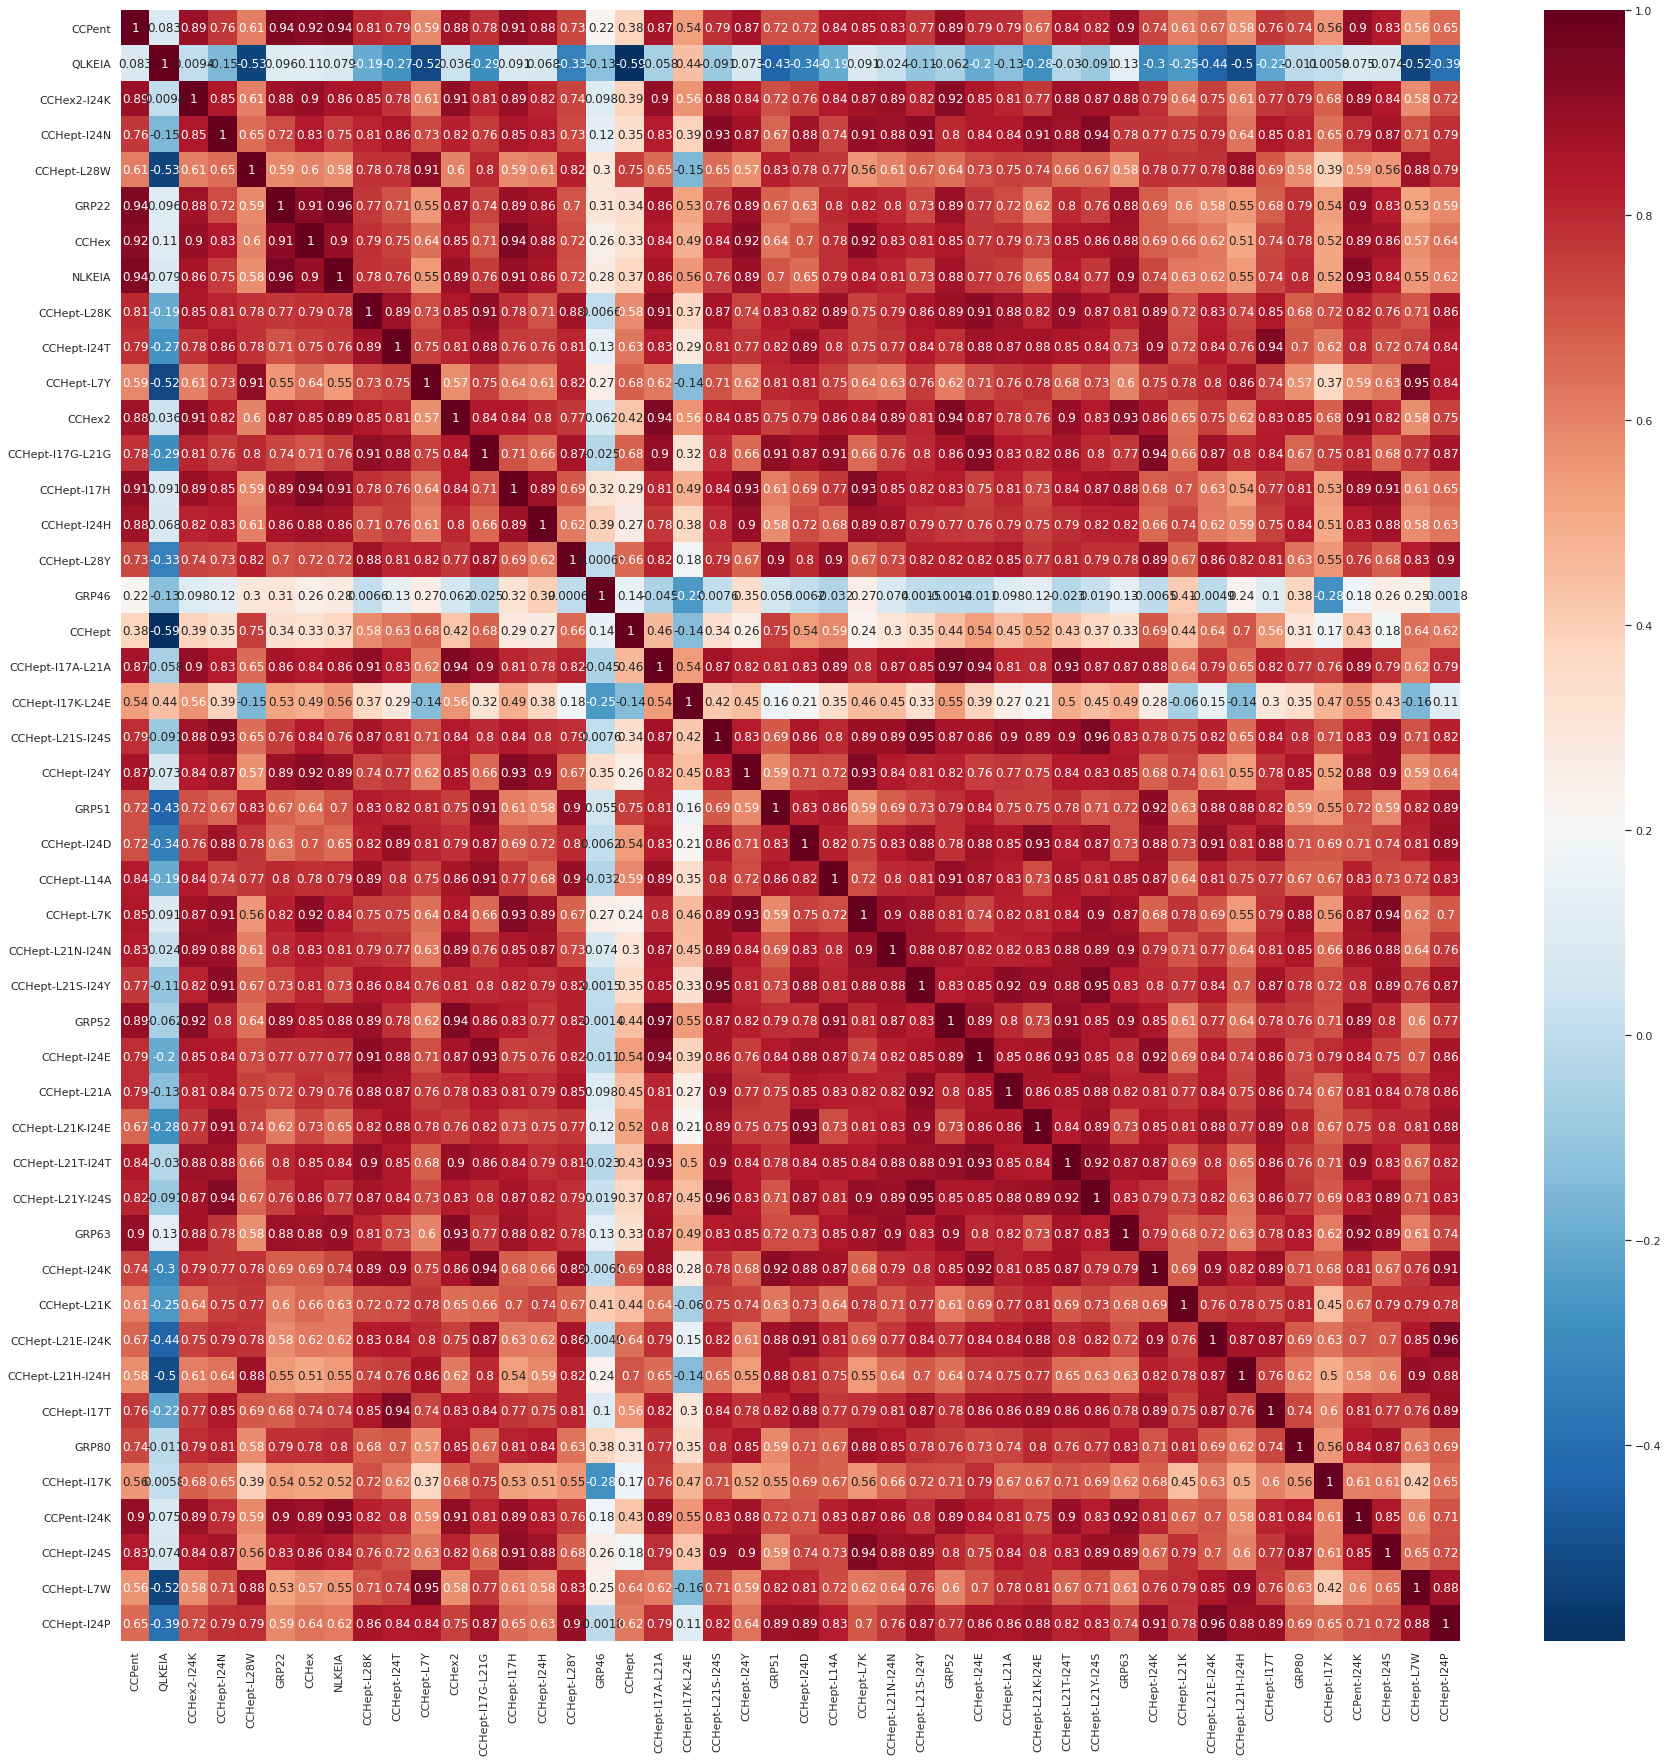

In [16]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features with ANOVA

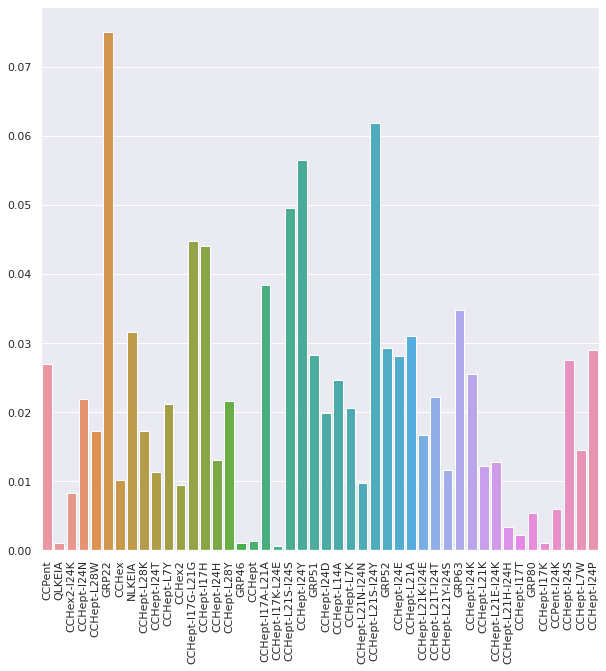

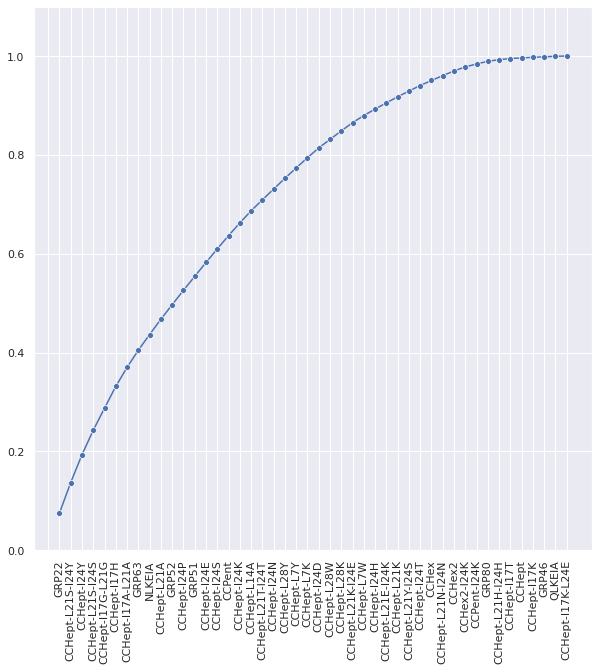

In [17]:
from sklearn.feature_selection import f_classif
f_classif_kbest_df = ml.calc_feature_importances_kbest(x=ml.x, y=ml.y, method_classif=f_classif)

In [18]:
print('Barrels ordered by ANOVA score:')
f_classif_top_barrels = f_classif_kbest_df.nlargest(n=46, columns='Score')
f_classif_top_barrels

Barrels ordered by ANOVA score:


Feature     Score
0              GRP22  0.074946
1   CCHept-L21S-I24Y  0.061865
2        CCHept-I24Y  0.056430
3   CCHept-L21S-I24S  0.049527
4   CCHept-I17G-L21G  0.044702
5        CCHept-I17H  0.044031
6   CCHept-I17A-L21A  0.038442
7              GRP63  0.034793
8             NLKEIA  0.031641
9        CCHept-L21A  0.031026
10             GRP52  0.029295
11       CCHept-I24P  0.029030
12             GRP51  0.028282
13       CCHept-I24E  0.028135
14       CCHept-I24S  0.027477
15            CCPent  0.026924
16       CCHept-I24K  0.025527
17       CCHept-L14A  0.024636
18  CCHept-L21T-I24T  0.022187
19       CCHept-I24N  0.021851
20       CCHept-L28Y  0.021625
21        CCHept-L7Y  0.021119
22        CCHept-L7K  0.020636
23       CCHept-I24D  0.019816
24       CCHept-L28W  0.017222
25       CCHept-L28K  0.017218
26  CCHept-L21K-I24E  0.016614
27        CCHept-L7W  0.014524
28       CCHept-I24H  0.013003
29  CCHept-L21E-I24K  0.012714
30       CCHept-L21K  0.012134
31  CCHept-L21Y-I24S  0.011570
32       CCHept-I24T  0.011317
33             CCHex  0.010157
34  CCHept-L21N-I24N  0.009791
35            CCHex2  0.009484
36       CCHex2-I24K  0.008234
37       CCPent-I24K  0.005896
38             GRP80  0.005384
39  CCHept-L21H-I24H  0.003422
40       CCHept-I17T  0.002220
41            CCHept  0.001336
42       CCHept-I17K  0.001072
43             GRP46  0.001065
44            QLKEIA  0.001004
45  CCHept-I17K-L24E  0.000676

- Measure the relative importances of the initial 46 features with decision trees

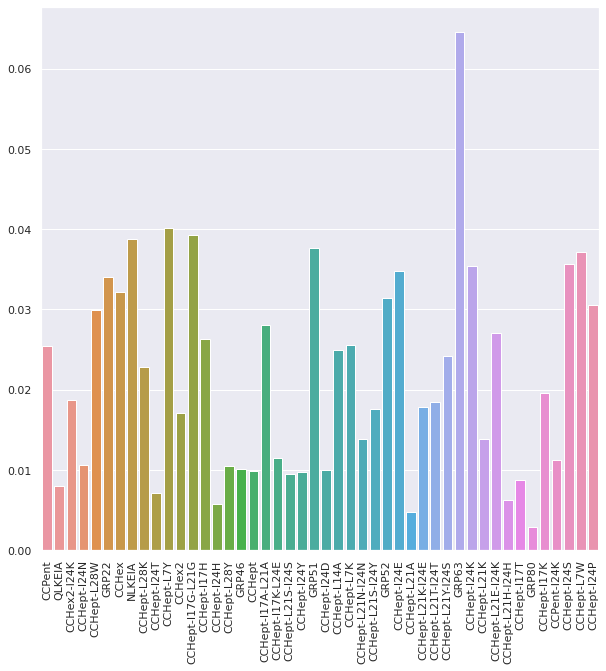

In [19]:
tree_feat_importances_df = ml.calc_feature_importances_tree(x=ml.x, y=ml.y)

In [20]:
print('Barrels ordered by tree score:')
tree_top_barrels = tree_feat_importances_df.nlargest(n=46, columns='Score')
tree_top_barrels

Barrels ordered by tree score:


Feature     Score
34             GRP63  0.064526
10        CCHept-L7Y  0.040175
12  CCHept-I17G-L21G  0.039277
7             NLKEIA  0.038845
22             GRP51  0.037705
44        CCHept-L7W  0.037171
43       CCHept-I24S  0.035703
35       CCHept-I24K  0.035402
29       CCHept-I24E  0.034848
5              GRP22  0.034049
6              CCHex  0.032164
28             GRP52  0.031462
45       CCHept-I24P  0.030610
4        CCHept-L28W  0.029876
18  CCHept-I17A-L21A  0.028029
37  CCHept-L21E-I24K  0.027052
13       CCHept-I17H  0.026270
25        CCHept-L7K  0.025597
0             CCPent  0.025454
24       CCHept-L14A  0.024929
33  CCHept-L21Y-I24S  0.024259
8        CCHept-L28K  0.022796
41       CCHept-I17K  0.019595
2        CCHex2-I24K  0.018675
32  CCHept-L21T-I24T  0.018450
31  CCHept-L21K-I24E  0.017879
27  CCHept-L21S-I24Y  0.017622
11            CCHex2  0.017056
36       CCHept-L21K  0.013900
26  CCHept-L21N-I24N  0.013840
19  CCHept-I17K-L24E  0.011509
42       CCPent-I24K  0.011215
3        CCHept-I24N  0.010639
15       CCHept-L28Y  0.010451
16             GRP46  0.010100
23       CCHept-I24D  0.010017
17            CCHept  0.009916
21       CCHept-I24Y  0.009795
20  CCHept-L21S-I24S  0.009518
39       CCHept-I17T  0.008736
1             QLKEIA  0.008038
9        CCHept-I24T  0.007129
38  CCHept-L21H-I24H  0.006287
14       CCHept-I24H  0.005776
30       CCHept-L21A  0.004729
40             GRP80  0.002928

- Run PCA to perform feature extraction and determine the number of features required to explain x% of the output signal

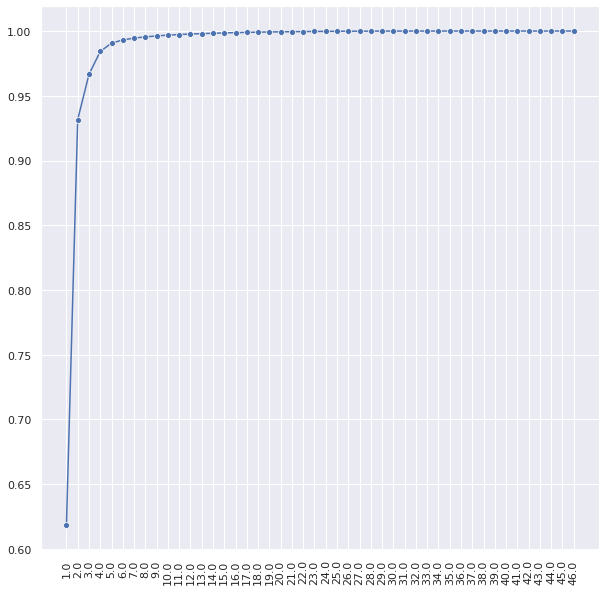

In [21]:
all_features_pca = ml.run_pca(x=ml.x)

\>90% of the data can be explained by 2 features, >95% by 3.

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [22]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [23]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1         -0.114811  0.638879    -0.101387    -0.138219    -0.128177   
2          0.113028  0.687236     0.090551     0.138131     0.065881   
3          0.015775 -0.326504     0.003268    -0.025483    -0.006021   
4          0.029800 -0.070355     0.026942     0.024888    -0.101704   
5         -0.142100 -0.020327    -0.120799     0.165185    -0.042728   
6          0.120831  0.000211     0.083985     0.085942    -0.197312   
7         -0.081214  0.013856    -0.039991    -0.233166    -0.181652   
8         -0.024973 -0.035941    -0.223771    -0.043644    -0.186439   
9         -0.144797  0.020979     0.334714    -0.080783     0.012025   
10         0.151434 -0.014714     0.244268    -0.099782     0.017396   
11         0.018842  0.022832    -0.108276    -0.062973     0.504844   
12         0.271242 -0.009087    -0.142617    -0.148935    -0.087724   
13        -0.033009  0.035345    -0.255786    -0.338636     0.131085   
14         0.073498 -0.008807    -0.097284    -0.071341    -0.092846   
15        -0.101767  0.028636     0.163941     0.135033     0.012105   
16         0.163166  0.022133    -0.013880     0.097070    -0.051375   
17        -0.002755  0.009057    -0.199507    -0.045288     0.156143   
18        -0.129713 -0.005291    -0.255999     0.056426     0.095300   
19         0.030179  0.000601    -0.253611     0.128298    -0.014737   
20         0.191307 -0.001746     0.088437    -0.035866    -0.020569   
21         0.354142  0.019464    -0.118911     0.166837     0.105991   
22        -0.022407 -0.024704    -0.015854    -0.000403     0.035853   
23        -0.105767  0.019262    -0.096518    -0.089251    -0.143287   
24        -0.005852 -0.001028     0.100377    -0.001495    -0.236500   
25        -0.237170  0.004828     0.103931     0.039624    -0.026740   
26         0.043066 -0.004571     0.249173    -0.250378     0.143183   
27        -0.227723  0.001557     0.068790     0.058782     0.462324   
28         0.001761 -0.001062     0.316232    -0.191479    -0.013337   
29         0.004099 -0.009371    -0.081517     0.238015    -0.142338   
30         0.048991 -0.014101    -0.241804    -0.168065    -0.013155   
31        -0.226057 -0.007002    -0.062266     0.226749    -0.201082   
32         0.270038  0.009820    -0.078942     0.025183     0.257624   
33         0.361911  0.001000     0.160351     0.084249    -0.051237   
34        -0.054206 -0.013843     0.152161     0.246511    -0.012917   
35        -0.054289 -0.001561    -0.094612     0.386604     0.038864   
36        -0.045080 -0.001588    -0.000018     0.195794     0.205605   
37        -0.233887  0.001775    -0.024974     0.035684    -0.018885   
38         0.229347  0.000969    -0.001760     0.157367    -0.052129   
39         0.020544  0.004724     0.017247    -0.051497     0.133008   
40        -0.011987  0.002035    -0.023833    -0.164043    -0.044527   
41         0.117851  0.001563     0.184821     0.080683     0.017120   
42         0.131864 -0.002306    -0.089088    -0.192153    -0.102263   
43         0.099115  0.000349    -0.122199     0.108943    -0.021608   
44        -0.227420  0.000078     0.068796    -0.046999    -0.005142   
45        -0.043956 -0.000923    -0.126760    -0.061191    -0.051982   
46         0.013871 -0.000129    -0.022291     0.083223     0.002039   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.079949 -0.099735 -0.077501    -0.109492    -0.128116  ...   
2          0.069867  0.129911  0.070334     0.108913     0.122347  ...   
3          0.008609  0.030978  0.011423     0.016721    -0.011287  ...   
4          0.016101  0.033092  0.018017    -0.067628    -0.017597  ...   
5         -0.220177 -0.019035 -0.135514    -0.114986    -0.088100  ...   
6          0.049467  0.297443  0.05682

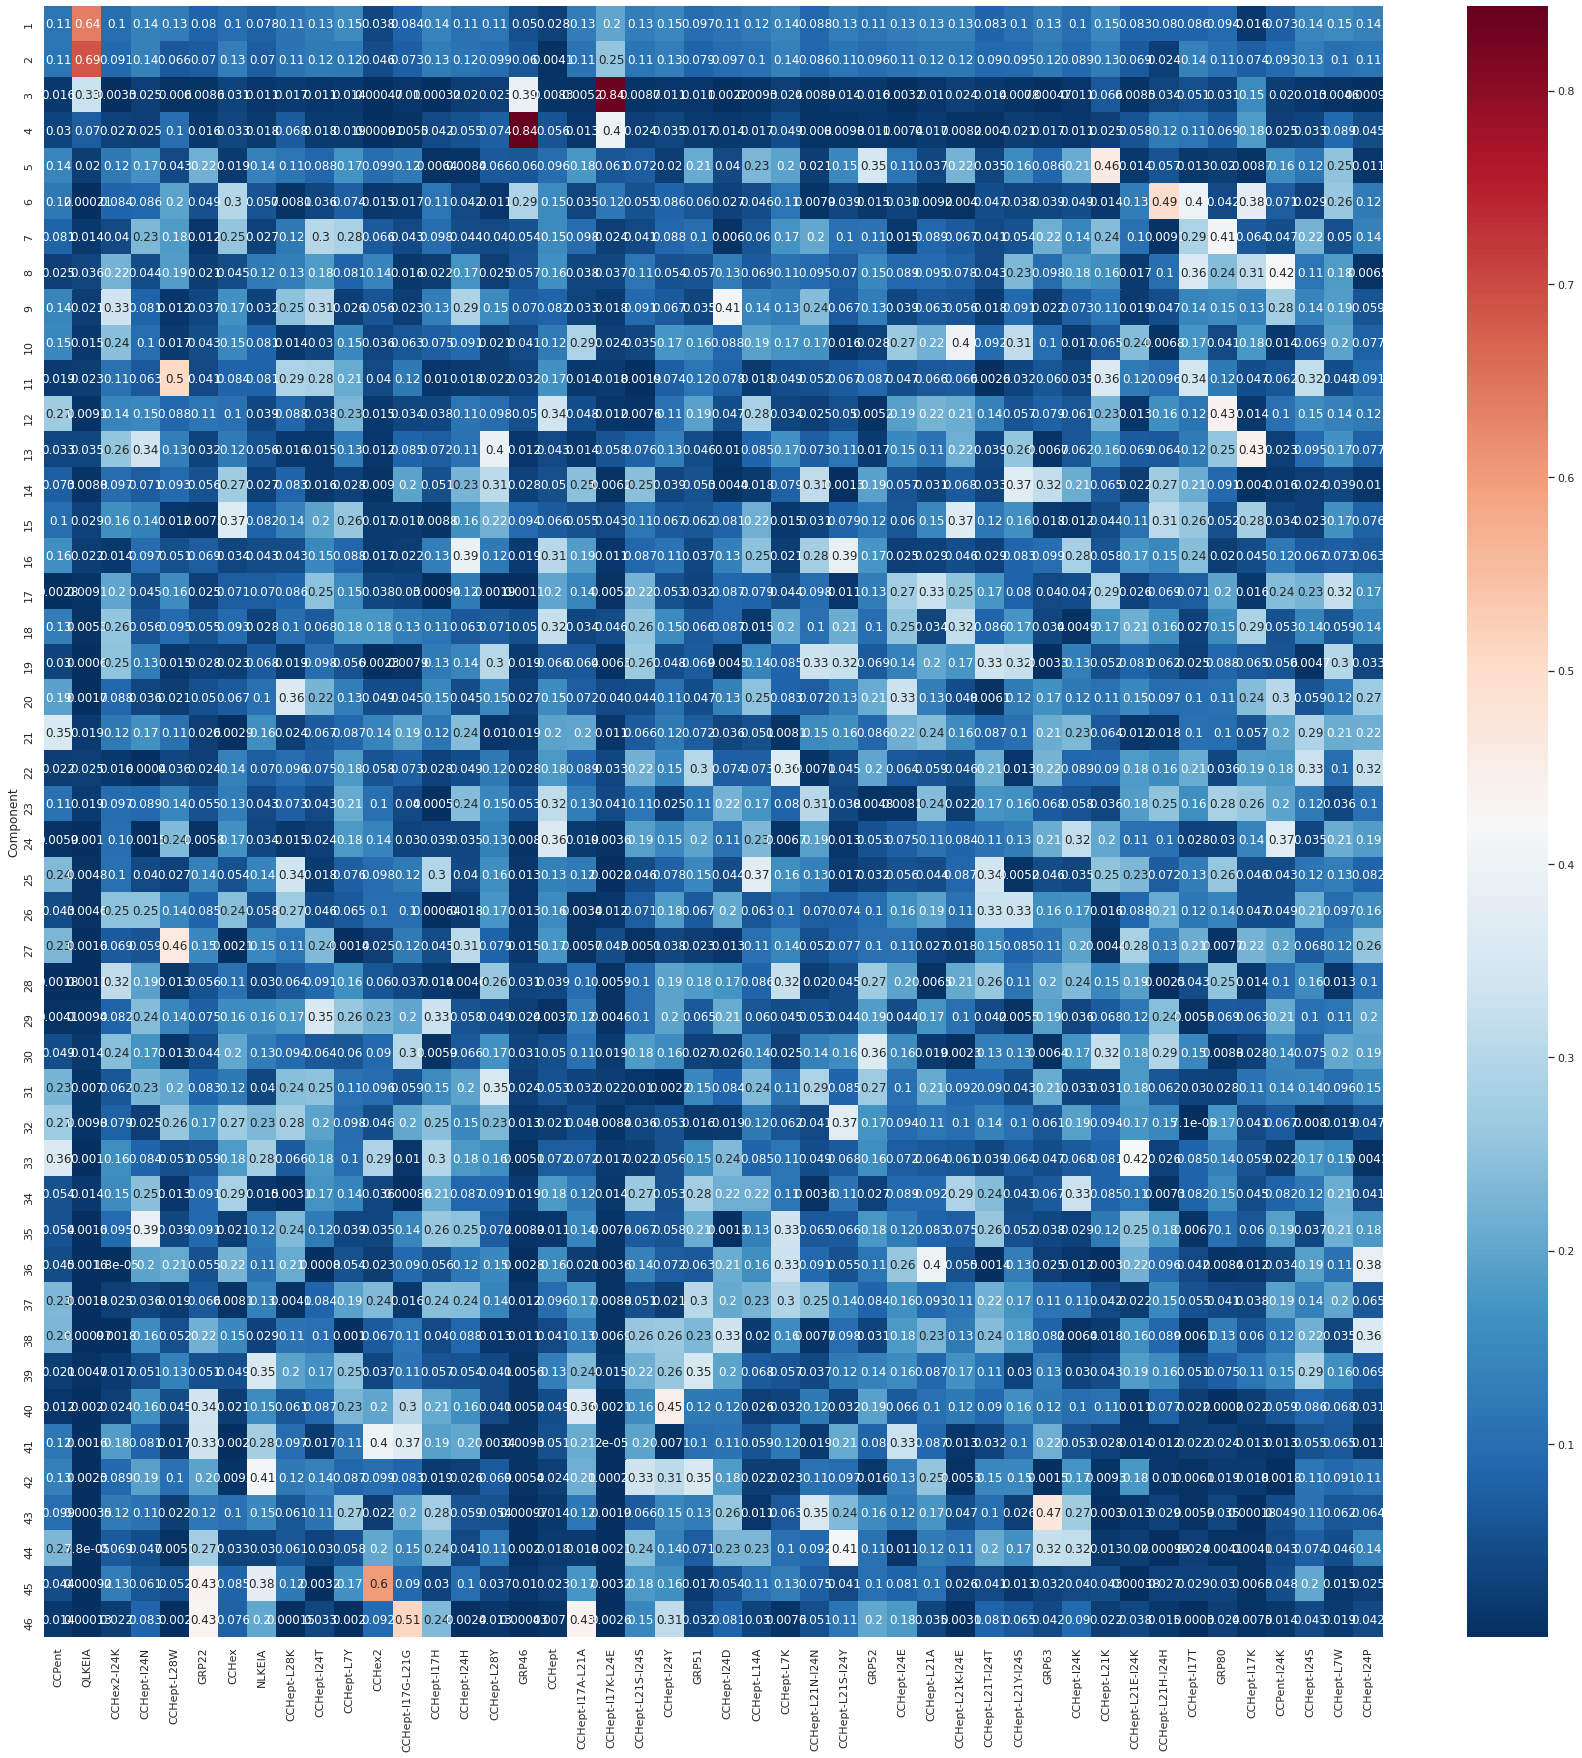

In [24]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [25]:
top_pca_components = []
for row in range(pca_components.shape[0]):
    indices = np.argsort(pca_components.abs().iloc[row])
    barrel_1 = ml.features[indices[-1]]
    barrel_2 = ml.features[indices[-2]]
    for barrel in [barrel_1, barrel_2]:
        if not barrel in top_pca_components:
            top_pca_components.append(barrel)

print('Top two barrels per PCA component:')
for barrel in top_pca_components:
    print(barrel)
print(len(top_pca_components))

Top two barrels per PCA component:
QLKEIA
CCHept-I17K-L24E
GRP46
CCHept-L21K
GRP52
CCHept-L21H-I24H
CCHept-I17T
GRP80
CCHept-I24T
CCPent-I24K
CCHept-I24D
CCHex2-I24K
CCHept-L21K-I24E
CCHept-L21Y-I24S
CCHept-L28W
CCHept
CCHept-I17K
CCHept-L28Y
GRP63
CCHex
CCHept-I24H
CCHept-L21S-I24Y
CCHept-L21A
CCHept-L7W
CCHept-L21T-I24T
CCHept-L21N-I24N
CCHept-L28K
CCHept-I24E
CCPent
CCHept-I24S
CCHept-L7K
CCHept-L14A
CCHept-I17H
CCHept-L21E-I24K
CCHept-I24K
CCHept-I24N
CCHept-I24P
GRP51
NLKEIA
CCHept-I24Y
CCHept-I17A-L21A
CCHex2
CCHept-I17G-L21G
GRP22
44


Relative contribution of each barrel to the different PCA components

In [26]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components).abs().div(col_sums, axis=1)

In [27]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.022308  0.301053     0.018527     0.025102     0.027596   
2          0.021961  0.323840     0.016547     0.025086     0.014184   
3          0.003065  0.153855     0.000597     0.004628     0.001296   
4          0.005790  0.033153     0.004923     0.004520     0.021896   
5          0.027610  0.009578     0.022075     0.029999     0.009199   
6          0.023478  0.000100     0.015348     0.015608     0.042480   
7          0.015780  0.006529     0.007308     0.042345     0.039109   
8          0.004852  0.016936     0.040892     0.007926     0.040139   
9          0.028134  0.009886     0.061166     0.014671     0.002589   
10         0.029424  0.006934     0.044638     0.018121     0.003745   
11         0.003661  0.010759     0.019786     0.011437     0.108690   
12         0.052703  0.004282     0.026062     0.027048     0.018887   
13         0.006414  0.016655     0.046743     0.061500     0.028222   
14         0.014281  0.004150     0.017778     0.012956     0.019989   
15         0.019773  0.013494     0.029959     0.024523     0.002606   
16         0.031703  0.010430     0.002536     0.017629     0.011061   
17         0.000535  0.004268     0.036458     0.008225     0.033617   
18         0.025203  0.002493     0.046781     0.010248     0.020518   
19         0.005864  0.000283     0.046345     0.023300     0.003173   
20         0.037171  0.000823     0.016161     0.006514     0.004428   
21         0.068810  0.009172     0.021730     0.030299     0.022819   
22         0.004354  0.011641     0.002897     0.000073     0.007719   
23         0.020551  0.009077     0.017638     0.016209     0.030849   
24         0.001137  0.000484     0.018343     0.000272     0.050917   
25         0.046083  0.002275     0.018992     0.007196     0.005757   
26         0.008368  0.002154     0.045534     0.045471     0.030827   
27         0.044247  0.000734     0.012571     0.010675     0.099536   
28         0.000342  0.000500     0.057788     0.034775     0.002871   
29         0.000797  0.004416     0.014896     0.043226     0.030645   
30         0.009519  0.006645     0.044187     0.030522     0.002832   
31         0.043923  0.003300     0.011379     0.041180     0.043292   
32         0.052469  0.004627     0.014426     0.004574     0.055465   
33         0.070320  0.000471     0.029303     0.015300     0.011031   
34         0.010532  0.006523     0.027806     0.044769     0.002781   
35         0.010548  0.000735     0.017289     0.070211     0.008367   
36         0.008759  0.000748     0.000003     0.035558     0.044266   
37         0.045445  0.000836     0.004564     0.006481     0.004066   
38         0.044562  0.000457     0.000322     0.028580     0.011223   
39         0.003992  0.002226     0.003152     0.009352     0.028636   
40         0.002329  0.000959     0.004355     0.029792     0.009586   
41         0.022899  0.000736     0.033774     0.014653     0.003686   
42         0.025621  0.001087     0.016280     0.034897     0.022017   
43         0.019258  0.000164     0.022331     0.019785     0.004652   
44         0.044188  0.000037     0.012572     0.008536     0.001107   
45         0.008541  0.000435     0.023164     0.011113     0.011192   
46         0.002695  0.000061     0.004073     0.015114     0.000439   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.017019  0.018803  0.015170     0.020712     0.024330  ...   
2          0.014873  0.024492  0.013767     0.020603     0.023234  ...   
3          0.001833  0.005840  0.002236     0.003163     0.002143  ...   
4          0.003427  0.006239  0.003527     0.012793     0.003342  ...   
5          0.046870  0.003589  0.026525     0.021751     0.016731  ...   
6          0.010530  0.056077  0.01112

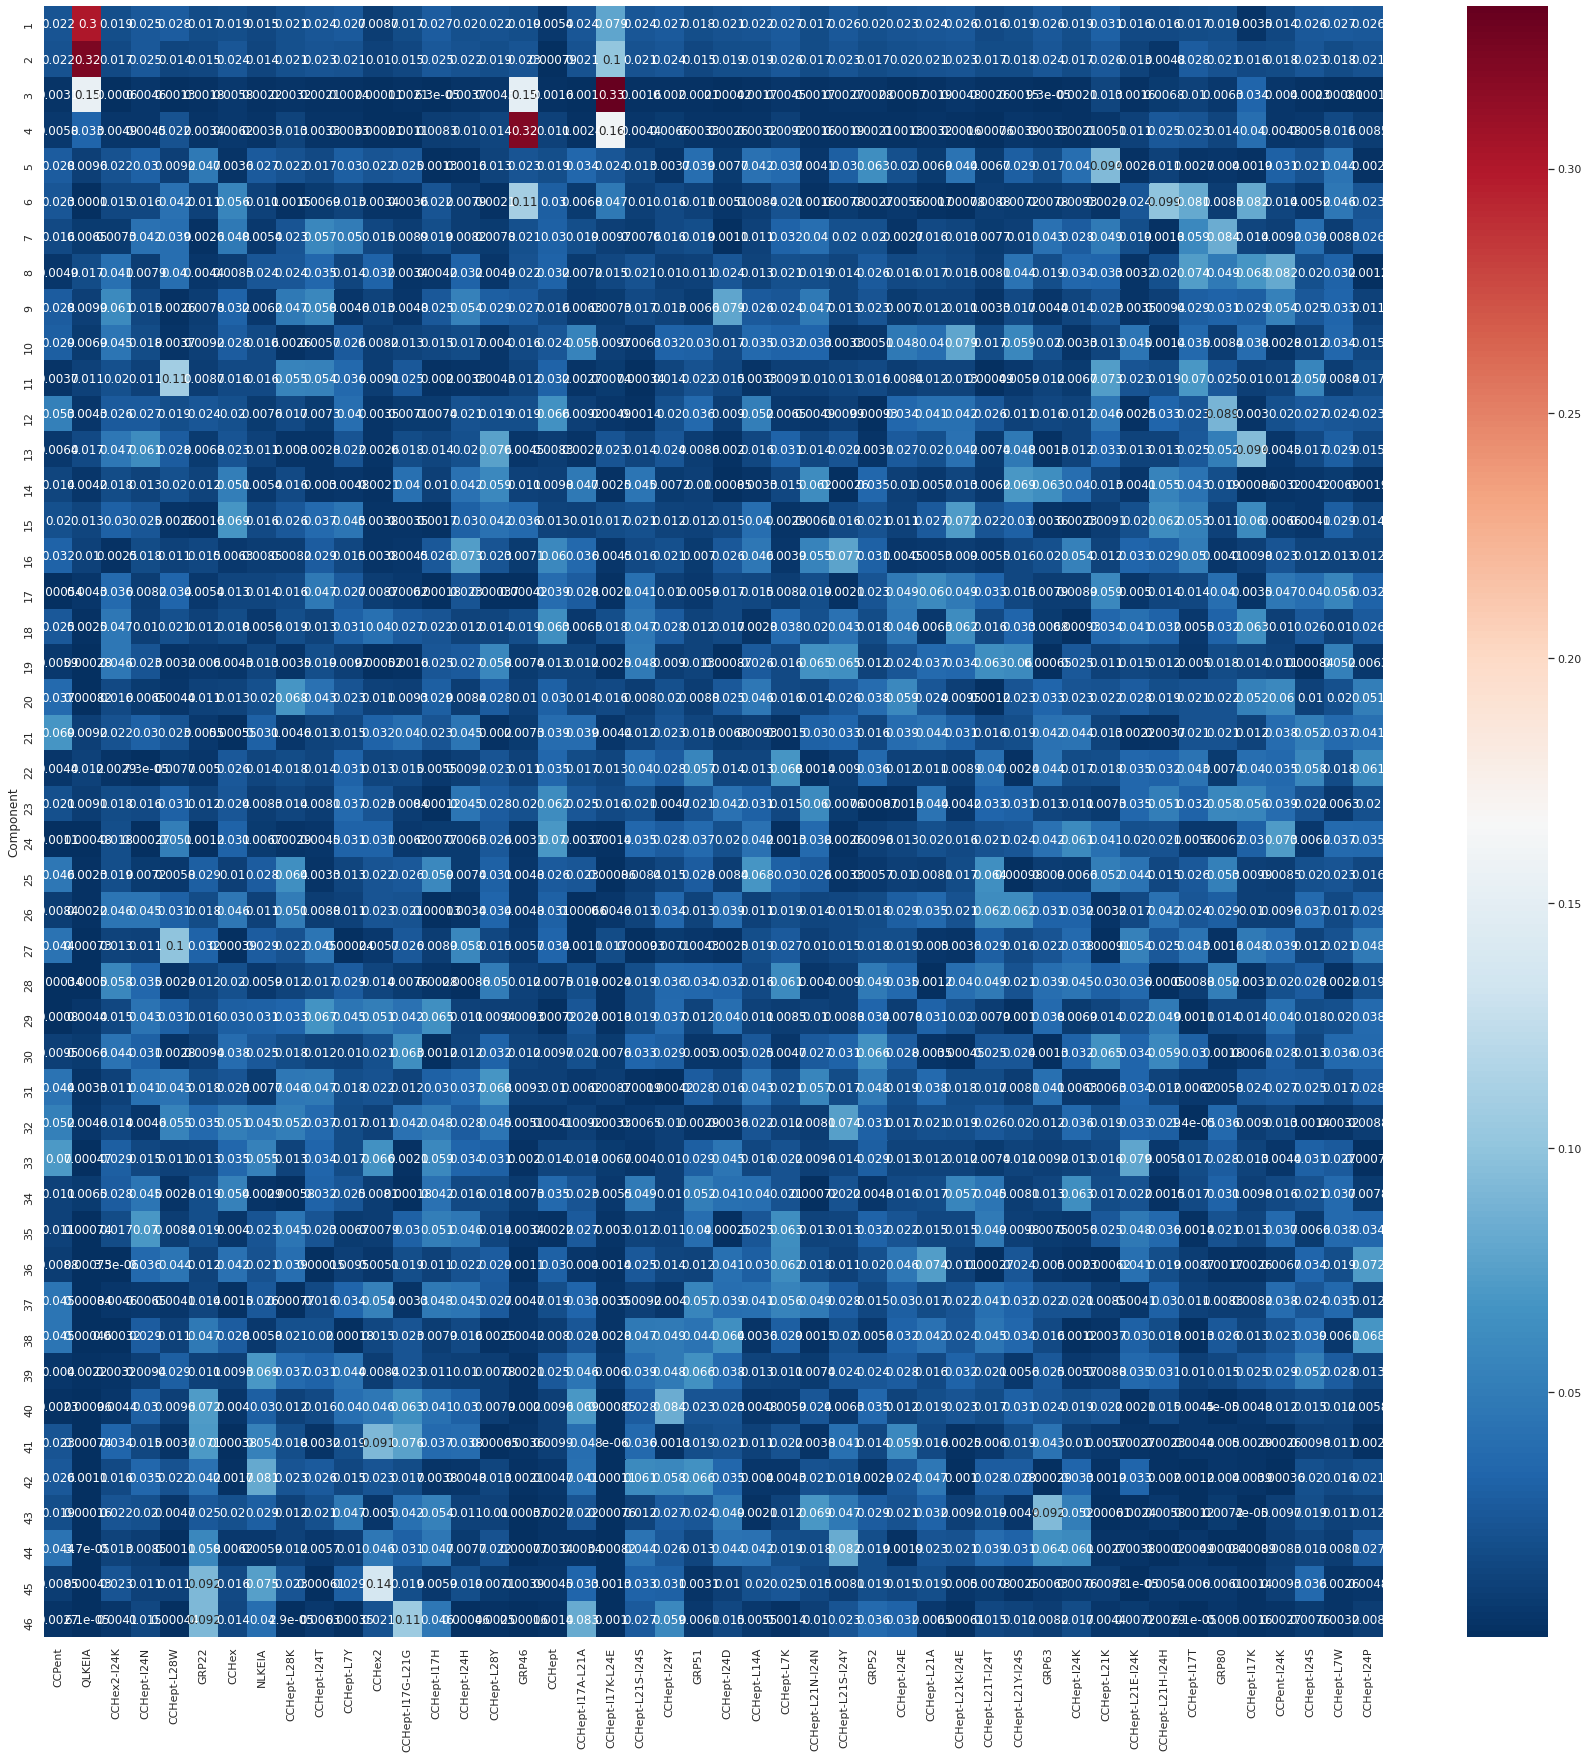

In [28]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components, cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_relative_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [29]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    # random.shuffle(extra_colours)
    colours += extra_colours[::-1]
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            cat_colours[cat] = current_colour
            marker_count = 0
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

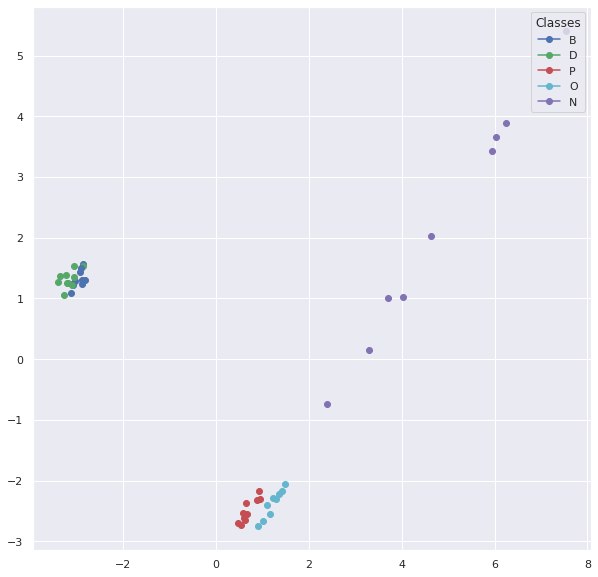

In [30]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 2D scatter plot
plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

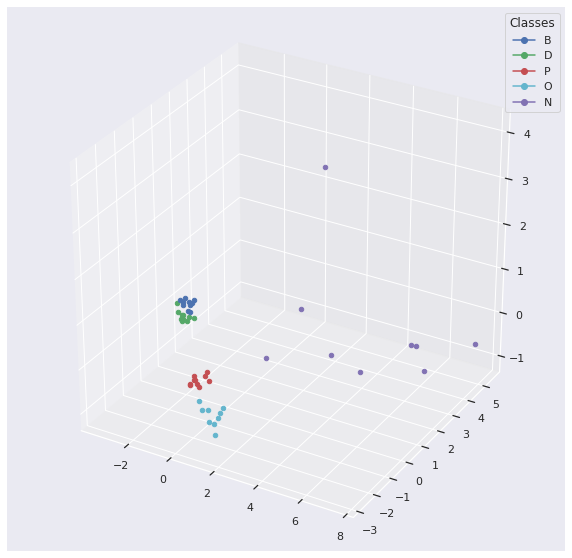

In [31]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
pca_fitted = pca_3d.fit(X=ml.x)
X_reduced_3d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
plot_scatter(
    x_data=X_reduced_3d, y_data=ml.y, dimensions=3, categories=['B', 'D', 'P', 'O', 'N'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

##### Train models with different numbers of features and/or PCA components

- All features

Runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [32]:
n_components_pca = None  # Specifies not to run PCA
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
all_feat_random_cv_searches = {}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]
for algorithm in algorithms:
    for resampling_method in resampling_methods:
        fixed_params = ml.define_fixed_model_params(clf=algorithm())
        tuned_params = ml.define_tuned_model_params(clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop)
        nested_cv_search = ml.run_nested_CV(
            clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups, selected_features=ml.features,
            n_components_pca=n_components_pca, run='randomsearch', fixed_params=fixed_params,
            tuned_params=tuned_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
            resampling_method=resampling_method, n_iter=n_iter, cv_folds_inner_loop=cv_folds_inner_loop,
            cv_folds_outer_loop=cv_folds_outer_loop, draw_conf_mat=False
        )

        score_dict['Algorithm'].append(algorithm.__name__)
        score_dict['Resampling_method'].append(resampling_method)
        score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
        score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
        all_feat_random_cv_searches['{}__{}'.format(algorithm.__name__, resampling_method)] = nested_cv_search

        for index, model in enumerate(nested_cv_search['outer_loop_models']):
            print('\n\n\n\n\n')
            print('{}: {}'.format(algorithm.__name__, resampling_method))
            print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
            print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

all_feat_random_search_score_df = pd.DataFrame(score_dict)

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 1.0






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 1.0






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.03162277660168379}
Accuracy: 1.0






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 1.0






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 1.0






KNeighborsClassifier: no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbors': 2}
Accuracy: 1.0






KNeighborsClassifier: no_balancing
Parameters: {'m

In [33]:
all_feat_random_search_score_df

Algorithm Resampling_method  Average_accuracy  Std_dev_accuracy
0    LogisticRegression      no_balancing               1.0               0.0
1  KNeighborsClassifier      no_balancing               1.0               0.0
2            GaussianNB      no_balancing               1.0               0.0
3             LinearSVC      no_balancing               1.0               0.0
4                   SVC      no_balancing               1.0               0.0

All algorithms perform equally well, so will select GaussianNB since is the simplest model (no hyperparameters to tune)

In [34]:
all_feat_random_cv_searches['SVC__no_balancing']['outer_loop_params']

[{'gamma': 0.0625, 'C': 16384.0},
 {'gamma': 0.08838834764831845, 'C': 1.4142135623730951},
 {'gamma': 0.125, 'C': 11.313708498984761},
 {'gamma': 8.631674575031098e-05, 'C': 4096.0},
 {'gamma': 0.04419417382415922, 'C': 90.50966799187809}]

In [35]:
all_feat_random_cv_searches['SVC__no_balancing']['best_outer_loop_params']

{'gamma': 0.0625, 'C': 16384.0}

In [36]:
all_feat_random_cv_searches['SVC__no_balancing']['test_scores']['accuracy']

[1.0, 1.0, 1.0, 1.0, 1.0]

In [37]:
all_feat_pred = all_feat_random_cv_searches['SVC__no_balancing']['predictions']
all_feat_y_true = all_feat_random_cv_searches['SVC__no_balancing']['y_true']
all_feat_x_true = all_feat_random_cv_searches['SVC__no_balancing']['x_true']

all_feat_flat_pred = [pred for pred_array in all_feat_pred for pred in pred_array]
all_feat_flat_y_true = [y for y_array in all_feat_y_true for y in y_array]
all_feat_flat_x_true = np.array([x for x_array in all_feat_x_true for x in x_array])

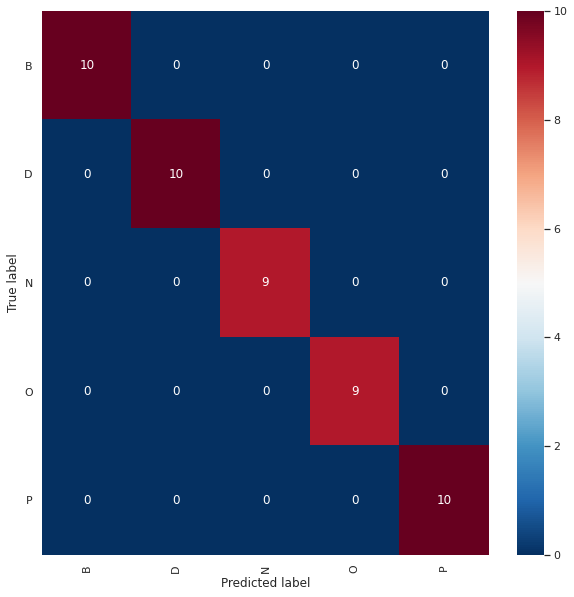

Normalised over true label (rows)


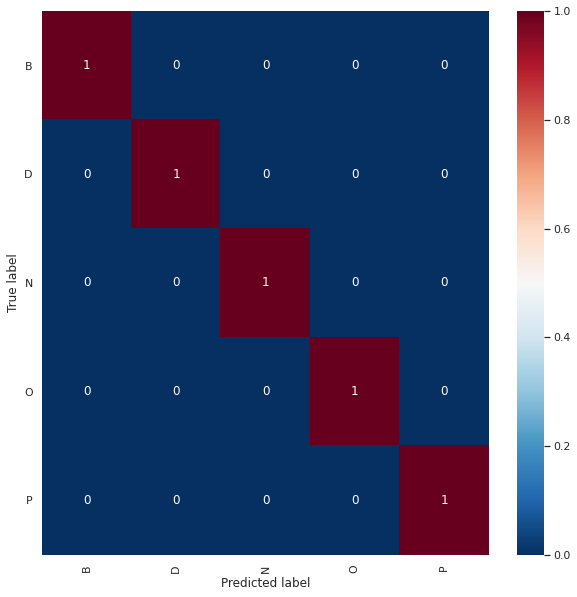

Normalised over pred label (columns)


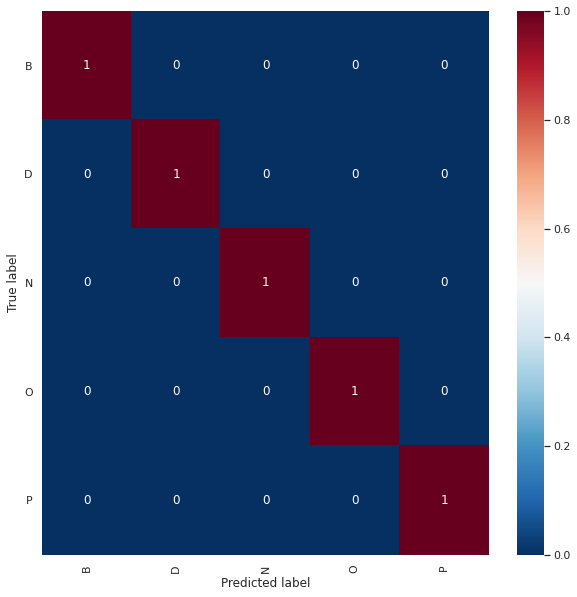

In [38]:
normalisation_methods = OrderedDict({None: '',
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(all_feat_flat_y_true, all_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=all_feat_flat_y_true, y_pred=all_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.savefig('{}/All_feat_confusion_matrix.svg'.format(ml.results_dir))
    plt.show()

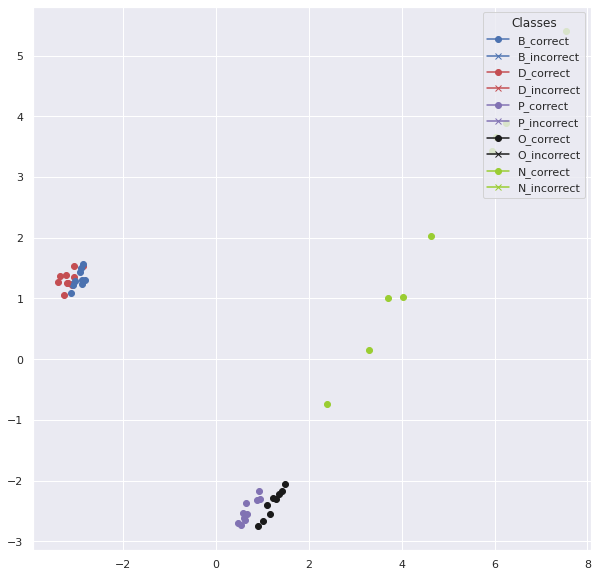

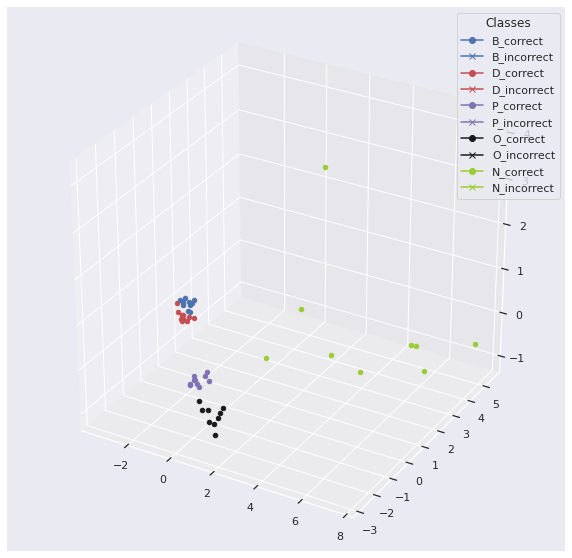

In [39]:
all_feat_X_test_reduced = pca_fitted.transform(X=all_feat_flat_x_true)
all_feat_pred_hue = []
for index, y in enumerate(all_feat_flat_y_true):
    if all_feat_flat_pred[index] == y:
        all_feat_pred_hue.append('{}_correct'.format(y))
    else:
        all_feat_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=2,
    categories=['B_correct', 'B_incorrect', 'D_correct', 'D_incorrect', 'P_correct', 'P_incorrect', 'O_correct',
                'O_incorrect', 'N_correct', 'N_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=3,
    categories=['B_correct', 'B_incorrect', 'D_correct', 'D_incorrect', 'P_correct', 'P_incorrect', 'O_correct',
                'O_incorrect', 'N_correct', 'N_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# B_incorrect = Value that is actually butanoic acid is predicted to be something else

- Feature reduction - how many barrels can I reduce the array to whilst maintaining / improving performance?

Compares 3 different methods of feature reduction / extraction with 8 different numbers of features. For each method, runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- feature selection
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [40]:
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

num_features = [1, 2, 3, 5, 10, 15, 20, 30]
red_methods = ['anova', 'tree', 'top_pca_components']  # 'pca' - can't use to reduce number of barrels
red_data = {'pca': {'selected_features': ml.features},
            'anova': {'selected_features': f_classif_top_barrels['Feature'].tolist()},
            'tree': {'selected_features': tree_top_barrels['Feature'].tolist()},
            'top_pca_components': {'selected_features': top_pca_components}}
resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]

score_dict = OrderedDict({'Number_of_features': [],
                          'Feature_reduction_method': [],
                          'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

red_feat_random_cv_searches = {}
for num in num_features:
    for red_method in red_methods:
        for algorithm in algorithms:
            for resampling_method in resampling_methods:
                fixed_params = ml.define_fixed_model_params(clf=algorithm())
                tuned_params = ml.define_tuned_model_params(
                    clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop
                )
                if red_method == 'pca':
                    selected_features = red_data['pca']['selected_features']
                    n_components_pca = num
                else:
                    selected_features = red_data['pca']['selected_features'][:num]
                    n_components_pca = None

                nested_cv_search = ml.run_nested_CV(
                    clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups,
                    selected_features=selected_features, n_components_pca=n_components_pca, run='randomsearch',
                    fixed_params=fixed_params, tuned_params=tuned_params, train_scoring_func='accuracy',
                    test_scoring_funcs=scoring_funcs, resampling_method=resampling_method, n_iter=n_iter,
                    cv_folds_inner_loop=cv_folds_inner_loop, cv_folds_outer_loop=cv_folds_outer_loop,
                    draw_conf_mat=False
                )

                score_dict['Number_of_features'].append(num)
                score_dict['Feature_reduction_method'].append(red_method)
                score_dict['Algorithm'].append(algorithm.__name__)
                score_dict['Resampling_method'].append(resampling_method)
                score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
                score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
                red_feat_random_cv_searches[
                    '{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method)
                ] = nested_cv_search

                for index, model in enumerate(nested_cv_search['outer_loop_models']):
                    print('\n\n\n\n\n')
                    print('{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method))
                    print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
                    print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

red_feat_random_search_score_df = pd.DataFrame(score_dict)

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.7






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.7






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.7






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.8888888888888888






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.6666666666666666






1__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to co

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.7






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.9






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.7






1__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.6666666666666666






1__tree

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to co







1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.5






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.7






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.8






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.8888888888888888






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 0.7777777777777778






1__top_pca_component

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.7






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.9






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.9






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.8888888888888888






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.8888888888888888






2__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'we

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.8






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.7






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.8






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 1.0






2__tree__Logist

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.9






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 1.0






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.7






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 0.8






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.9






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.9






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.8888888888888888






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.7777777777777778






3__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'mi

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.8






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.8






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.9






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31622.7766016837

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.8






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.8






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.8






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.5555555555555556






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.6666666666666666






3__top_pca_components__KNeig

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.9






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 1.0






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.8






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 0.8888888888888888






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 1.0






5__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1,

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.9






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.9






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.8






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 1.0






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.8888888888888888






5__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbor

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 1.0






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.8






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.9






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.8888888888888888






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 1.0






5__top_pca_components__KNeighborsClassifier__no_balancing
Par

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 1.0






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.9






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 1.0






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Ac

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 1.0






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 1.0






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.9






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 1.0






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 1.0






10__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbors': 3}
Accuracy: 1.0





/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 1.0






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 1.0






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 1.0






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 1.0






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 1.0






10__top_pca_components__KNeighborsClassifier__no_balancing
Paramete

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 1.0






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 1.0






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 1.0






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 1.0






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 1.0






15__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbors': 2}
Accura

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py







15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 1.0






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 1.0






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 1.0






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.8888888888888888






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 1.0






15__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_nei

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 1.0






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 1.0






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 1.0






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 1.0






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 1.0






15__top_pca_components__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'm

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 1.0






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 1.0






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 1.0






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 1.0






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 1.0






20__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 1, 'n_neighbors'

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 1.0






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 1.0






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 1.0






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 1.0






20__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 1.0






20__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 1, 'n_neighbors': 2}
Accuracy

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0
Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 0.9






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 1.0






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 1.0






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 1.0






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 1.0






20__top_pca_components__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any eff







30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 1.0






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 1.0






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.9






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 1.0






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 1.0






30__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', 'p': 1, 'n_neighbors': 2}
Accu

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not conve







30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 1.0






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 1.0






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 1.0






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 1.0






30__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 1.0






30__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'uniform', '

/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 48.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ks17361/.local/share/virtualenvs/array_sensing_env-DruPQriL/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The ma







30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 1.0






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 1.0






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.9






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 1.0






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 1.0






30__top_pca_components__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski

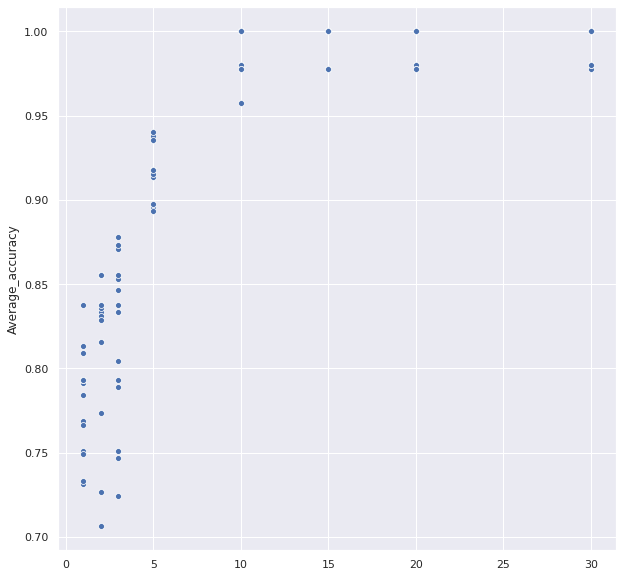

In [41]:
plt.clf()
sns.scatterplot(x=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                   5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                   10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                   15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                   20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                   30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
                y=red_feat_random_search_score_df['Average_accuracy'])
plt.show()

So, can achieve similar level of performance with 10 barrels

In [42]:
red_feat_random_search_score_df[red_feat_random_search_score_df['Number_of_features'] == 10]

Number_of_features Feature_reduction_method             Algorithm  \
60                  10                    anova    LogisticRegression   
61                  10                    anova  KNeighborsClassifier   
62                  10                    anova            GaussianNB   
63                  10                    anova             LinearSVC   
64                  10                    anova                   SVC   
65                  10                     tree    LogisticRegression   
66                  10                     tree  KNeighborsClassifier   
67                  10                     tree            GaussianNB   
68                  10                     tree             LinearSVC   
69                  10                     tree                   SVC   
70                  10       top_pca_components    LogisticRegression   
71                  10       top_pca_components  KNeighborsClassifier   
72                  10       top_pca_components            GaussianNB   
73                  10       top_pca_components             LinearSVC   
74                  10       top_pca_components                   SVC   

   Resampling_method  Average_accuracy  Std_dev_accuracy  
60      no_balancing          0.980000          0.040000  
61      no_balancing          1.000000          0.000000  
62      no_balancing          1.000000          0.000000  
63      no_balancing          0.980000          0.040000  
64      no_balancing          0.980000          0.040000  
65      no_balancing          0.980000          0.040000  
66      no_balancing          1.000000          0.000000  
67      no_balancing          0.980000          0.040000  
68      no_balancing          1.000000          0.000000  
69      no_balancing          0.957778          0.051831  
70      no_balancing          1.000000          0.000000  
71      no_balancing          1.000000          0.000000  
72      no_balancing          1.000000          0.000000  
73      no_balancing          0.977778          0.044444  
74      no_balancing          0.977778          0.044444

Best models perform with 100% accuracy - select one of these at random. Will pick GaussianNB (to match 46 barrel analysis) with feature selection with anova

In [43]:
red_feat_random_cv_searches['10__anova__GaussianNB__no_balancing']['outer_loop_params']

[{}, {}, {}, {}, {}]

In [44]:
red_feat_random_cv_searches['10__anova__GaussianNB__no_balancing']['best_outer_loop_params']

{}

In [45]:
red_feat_random_cv_searches['10__anova__GaussianNB__no_balancing']['test_scores']['accuracy']

[1.0, 1.0, 1.0, 1.0, 1.0]

In [46]:
red_feat_pred = red_feat_random_cv_searches['10__anova__GaussianNB__no_balancing']['predictions']
red_feat_y_true = red_feat_random_cv_searches['10__anova__GaussianNB__no_balancing']['y_true']
red_feat_x_true = red_feat_random_cv_searches['10__anova__GaussianNB__no_balancing']['x_true']

red_feat_flat_pred = [pred for pred_array in red_feat_pred for pred in pred_array]
red_feat_flat_y_true = [y for y_array in red_feat_y_true for y in y_array]
red_feat_flat_x_true = np.array([x for x_array in red_feat_x_true for x in x_array])

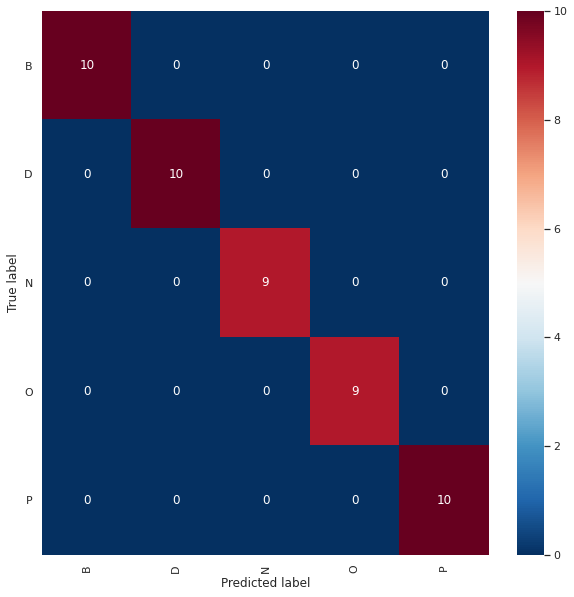

Normalised over true label (rows)


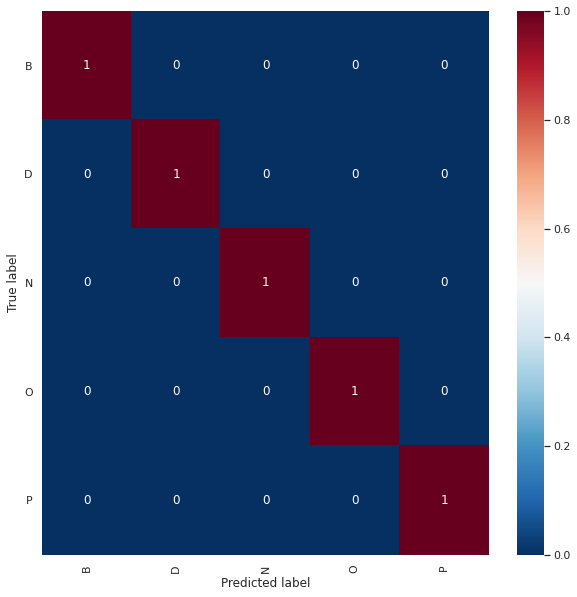

Normalised over pred label (columns)


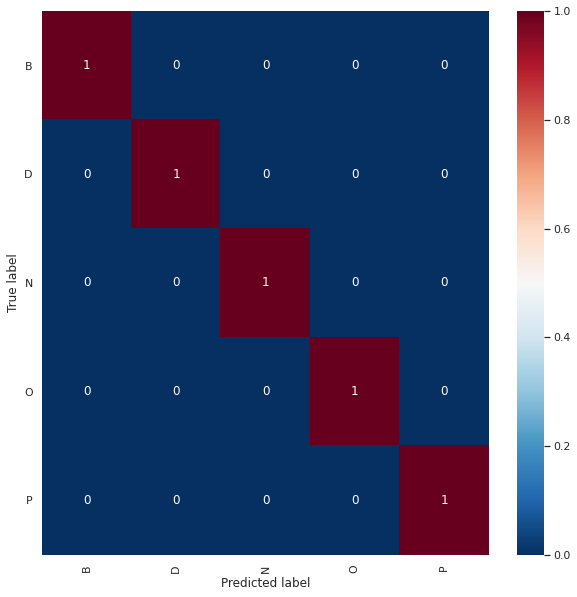

In [47]:
normalisation_methods = OrderedDict({None: '',
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(red_feat_flat_y_true, red_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=red_feat_flat_y_true, y_pred=red_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.show()

So, can reduce number of barrels from 46 to 10 and still train a classifier of 100% accuracy.